In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model

def get_weights(model):
    return [layer.get_weights() for layer in model.layers]

globalmodel = load_model(r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\server\server_model_round3_cohort1.h5")
globalmodel_weights = get_weights(globalmodel)

# Print the shapes of each weight array
for weights_list in globalmodel_weights:
    for weight in weights_list:
        print(np.shape(weight)) 

(7, 17, 32)
(32,)
(32,)
(32,)
(32,)
(32,)
(7, 32, 16)
(16,)
(16,)
(16,)
(16,)
(16,)
(32, 5)
(5,)


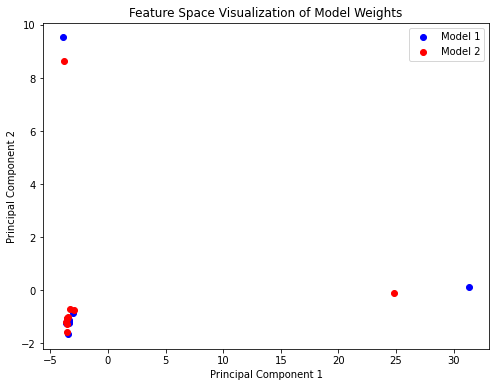

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from tensorflow.keras.models import load_model

def get_weights(model):
    """Extracts and flattens weights from a model."""
    all_weights = []
    for layer in model.layers:
        weights_list = layer.get_weights()
        for weight in weights_list:
            if weight.ndim > 1:  # Flatten weights if they are not already 1D
                all_weights.append(weight.flatten())
            else:
                all_weights.append(weight)
    return np.concatenate(all_weights)



# Load your models
model1 = load_model(r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\server\server_model_round3_cohort1.h5")
model2 = load_model(r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\server\server_model_round3_cohort2.h5")

# Extract and flatten weights
weights1 = get_weights(model1)
weights2 = get_weights(model2)

n_samples = 10  # Choose the number of samples you want to create
weights1_samples = np.array_split(weights1, n_samples)
weights2_samples = np.array_split(weights2, n_samples)

# Find the maximum length of samples
max_length = max(len(sample) for sample in weights1_samples)

# Pad samples to the maximum length
weights1_samples_padded = [np.pad(sample, (0, max_length - len(sample)), 'constant') for sample in weights1_samples]
weights2_samples_padded = [np.pad(sample, (0, max_length - len(sample)), 'constant') for sample in weights2_samples]

# Apply dimensionality reduction (PCA)
n_components = 2
pca = PCA(n_components=n_components, svd_solver='arpack')  # Use 'arpack' or 'randomized'
weights1_reduced = pca.fit_transform(weights1_samples_padded)
weights2_reduced = pca.transform(weights2_samples_padded)

# Plot the reduced weights (Adjust for your sampling method)
plt.figure(figsize=(8, 6))
plt.scatter(weights1_reduced[:, 0], weights1_reduced[:, 1], c='blue', label='Model 1')
plt.scatter(weights2_reduced[:, 0], weights2_reduced[:, 1], c='red', label='Model 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Feature Space Visualization of Model Weights')
plt.legend()
plt.show()

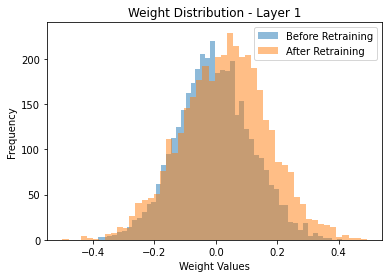

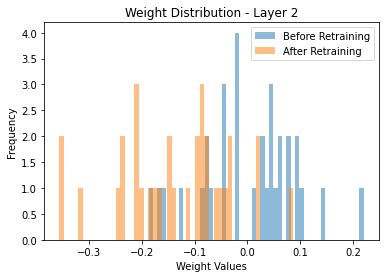

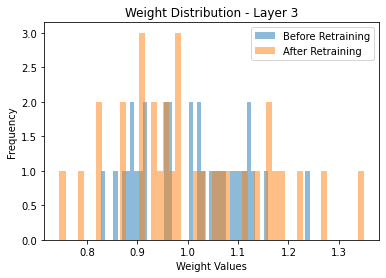

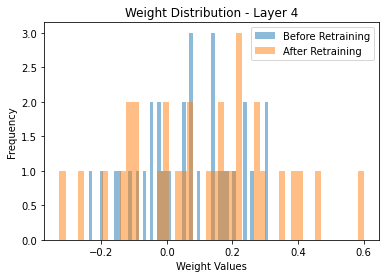

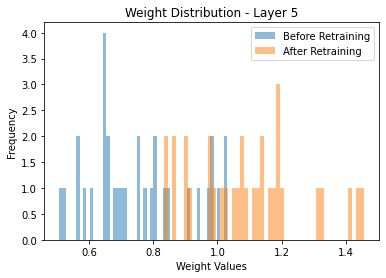

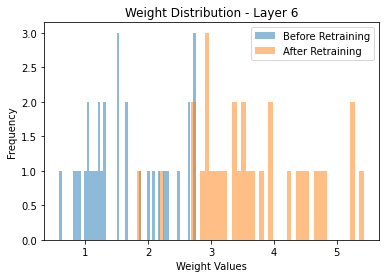

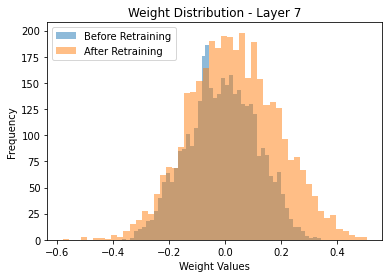

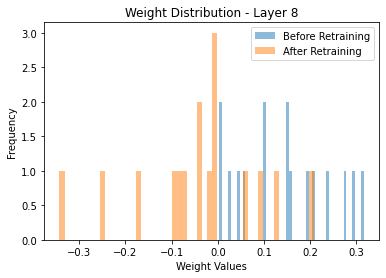

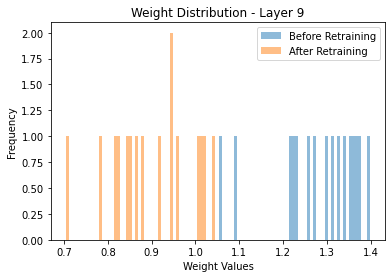

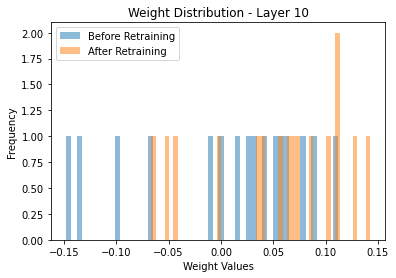

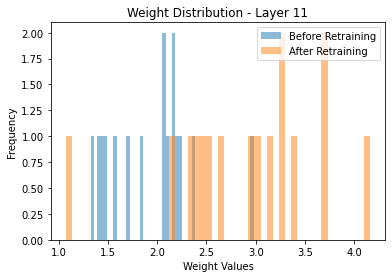

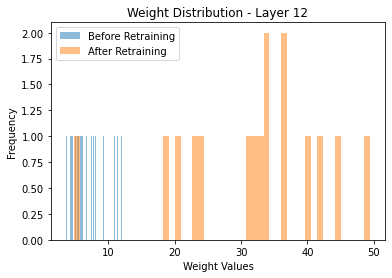

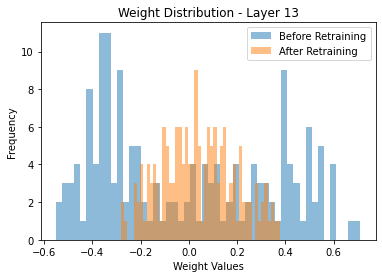

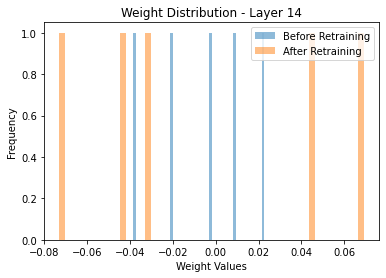

In [35]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


model_before = tf.keras.models.load_model(r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\server\server_model_round3_cohort1.h5")
model_after = tf.keras.models.load_model(r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\client2\Models\model_round_4.h5")

# Extract weights
model_before_weights = model_before.get_weights()
model_after_weights = model_after.get_weights()

# Define function to flatten weights
def flatten_weights(weights):
    flattened = [w.flatten() for w in weights]
    return np.concatenate(flattened)

# Flatten weights
weights_before = flatten_weights(model_before_weights)
weights_after = flatten_weights(model_after_weights)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
weights_combined = np.vstack((weights_before, weights_after))
pca.fit(weights_combined)

# Transform weights to lower dimensions
weights_before_2d = pca.transform(weights_before.reshape(1, -1))
weights_after_2d = pca.transform(weights_after.reshape(1, -1))

# ... (load models, extract weights) ...

for i in range(len(model_before_weights)):
    plt.figure()
    plt.hist(model_before_weights[i].flatten(), bins=50, alpha=0.5, label="Before Retraining")
    plt.hist(model_after_weights[i].flatten(), bins=50, alpha=0.5, label="After Retraining")
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Weight Distribution - Layer {i+1}")
    plt.show()

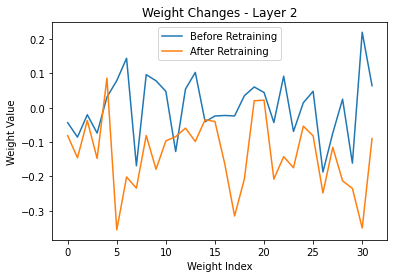

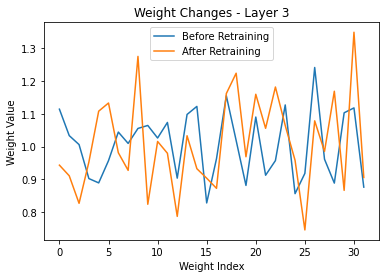

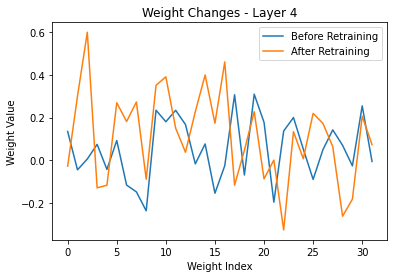

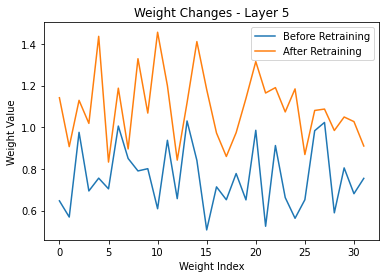

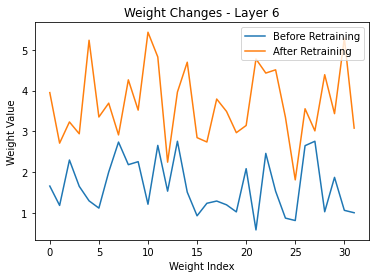

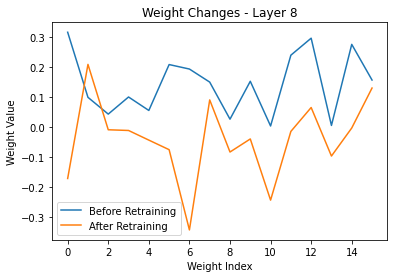

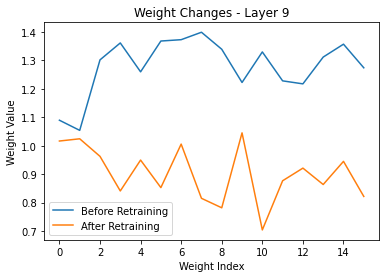

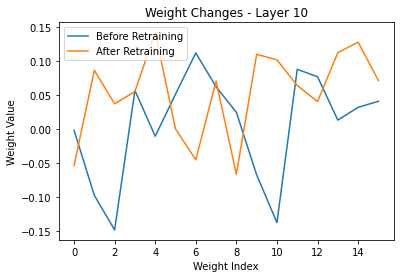

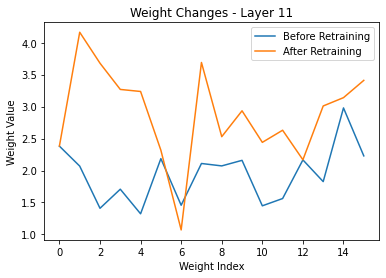

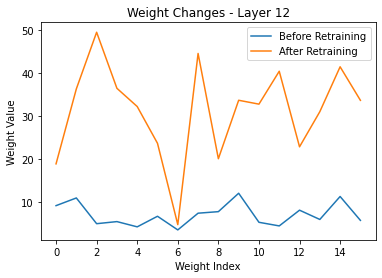

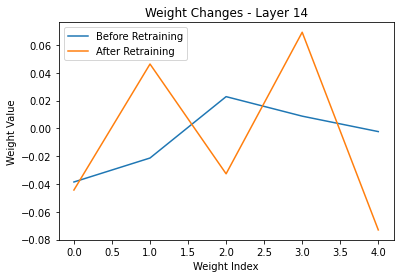

In [36]:
# ... (load models, extract weights) ...

for i in range(len(model_before_weights)):
    if model_before_weights[i].ndim == 1:  # Check if 1D weights
        plt.figure()
        plt.plot(model_before_weights[i], label="Before Retraining")
        plt.plot(model_after_weights[i], label="After Retraining")
        plt.xlabel("Weight Index")
        plt.ylabel("Weight Value")
        plt.legend()
        plt.title(f"Weight Changes - Layer {i+1}")
        plt.show()

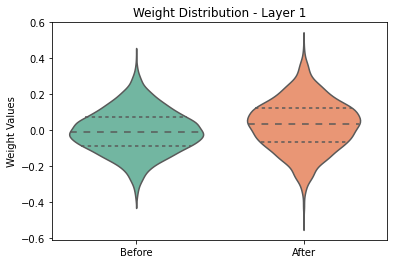

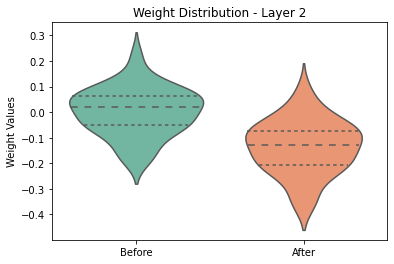

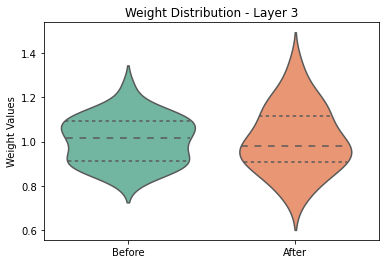

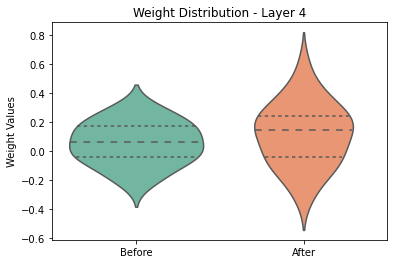

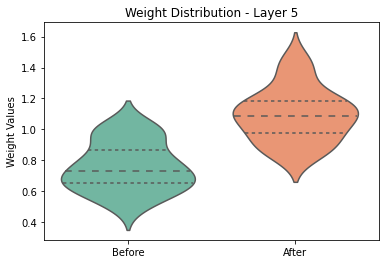

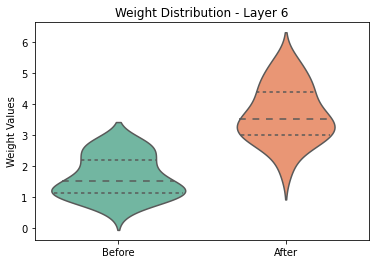

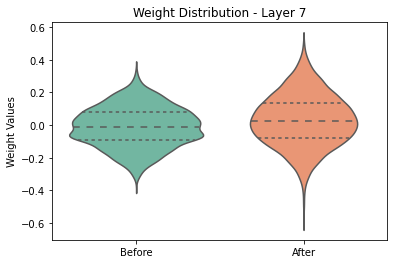

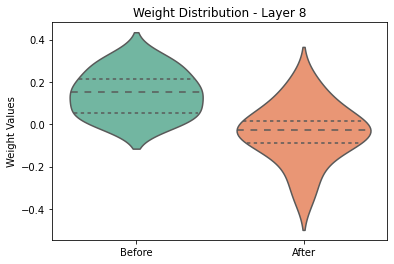

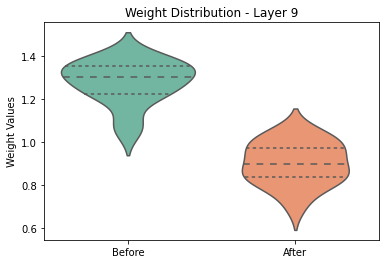

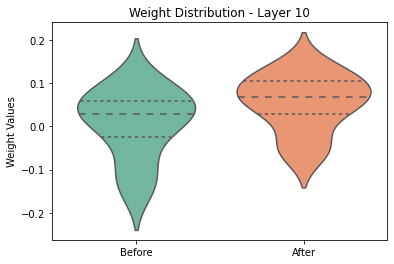

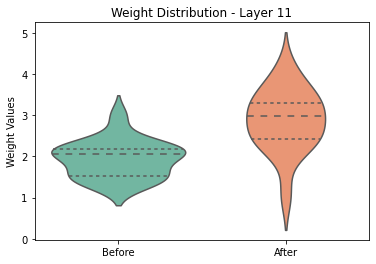

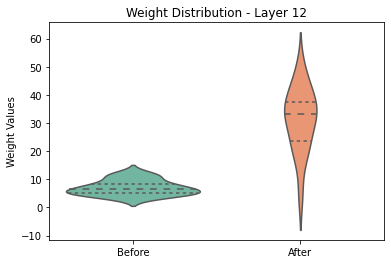

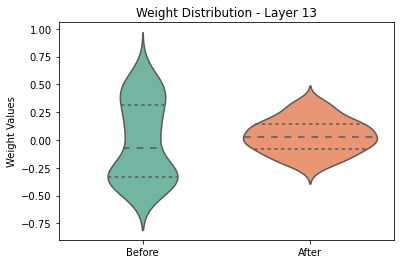

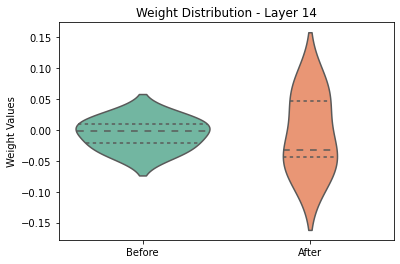

In [38]:
for i in range(len(model_before_weights)):
    plt.figure()
    data = [model_before_weights[i].flatten(), model_after_weights[i].flatten()]
    sns.violinplot(data=data, orient="v", inner="quartile", palette="Set2")
    plt.xticks([0, 1], ["Before", "After"])
    plt.ylabel("Weight Values")
    plt.title(f"Weight Distribution - Layer {i+1}")
    plt.show()